
# **Define bibliotecas para exploracao e puxa dados**

- podem ser colocados quantos termos de busca forem necessários
- o código rodará um loop para cada termo de busca e retornará 50 IDs (limite da API para usuários públicos) e salvará todos juntos em uma lista e CSV



In [5]:

# bibliotecas para análise exploratoria
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
from SearchProducts import getSearchProducts
#instancia
getSearchProducts = getSearchProducts()

termos_buscas = ["Google Home", "Apple TV", "Amazon fire", "Chromecast"] # colocar quantos termos de busca forem necessários

# função para buscar IDs
ids = getSearchProducts.getSearchIds(termos_buscas)
print("IDs encontrados:", ids)

# Defina os atributos que você quer buscar
atributos_extras = ["BRAND", "RAM_MEMORY", "STORAGE_CAPACITY"]

# Chame a função para buscar detalhes dos produtos
detalhes_produtos = getSearchProducts.getProductsDetails(ids, atributos_extras)
print("Detalhes dos produtos:", detalhes_produtos)


getSearchProducts.sendResultsCSV('produtos.csv')

IDs encontrados: ['MLA915561586', 'MLA1141052441', 'MLA1616758962', 'MLA912740661', 'MLA1597574484', 'MLA1398793543', 'MLA1125948601', 'MLA1398767505', 'MLA1384134643', 'MLA1597457958', 'MLA916372672', 'MLA1398755255', 'MLA1597677286', 'MLA1400539531', 'MLA1125935779', 'MLA1597470910', 'MLA1597677282', 'MLA1398845395', 'MLA930506223', 'MLA1448891827', 'MLA1907122196', 'MLA1616759000', 'MLA1683844336', 'MLA1398832615', 'MLA1597677284', 'MLA1400506527', 'MLA1398845475', 'MLA1154268993', 'MLA833417329', 'MLA912014012', 'MLA1110314122', 'MLA1110377590', 'MLA1693634994', 'MLA1412976451', 'MLA1432622907', 'MLA1364551668', 'MLA1443012353', 'MLA1569955706', 'MLA1361515563', 'MLA1432597373', 'MLA1422239063', 'MLA1361528507', 'MLA1436571213', 'MLA1437520249', 'MLA1450279761', 'MLA1892733826', 'MLA1820484428', 'MLA1447940415', 'MLA1807784940', 'MLA1416430677', 'MLA1366426083', 'MLA1449403463', 'MLA1399215546', 'MLA1555247434', 'MLA1539557184', 'MLA1594852796', 'MLA1719499042', 'MLA1426291701', 'M

_________________________________________________
# **Códigos para análise exploratória**




- monta um dataframe apartir do arquivo CSV :


In [6]:
#df_produtos = pd.DataFrame(dados_produtos)
df_produtos = pd.read_csv('produtos.csv')

- traz as informações básicas das colunas geradas, seus tipos e contagens, além de mostrar os valores nulos:


In [7]:
df_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  198 non-null    object 
 1   title               198 non-null    object 
 2   price               198 non-null    float64
 3   available_quantity  0 non-null      float64
 4   sold_quantity       0 non-null      float64
 5   condition           198 non-null    object 
 6   BRAND               198 non-null    object 
 7   RAM_MEMORY          129 non-null    object 
 8   STORAGE_CAPACITY    126 non-null    object 
dtypes: float64(3), object(6)
memory usage: 14.0+ KB


- conta os valores nulos das colunas:

In [8]:
print("valores nulos:")
df_produtos.isnull().sum()

valores nulos:


,0
id,0
title,0
price,0
available_quantity,198
sold_quantity,198
condition,0
BRAND,0
RAM_MEMORY,69
STORAGE_CAPACITY,72


- traz algumas linhas do dataframe para visualização:

In [9]:
print(df_produtos.head(10))
print("\n-----------######---------\n")
print(df_produtos.tail(10))

              id                                              title     price  \
0   MLA915561586  Google Home Mini Con Asistente Virtual Google ...   75990.0   
1  MLA1141052441  Google Nest Hub 2nd Gen Con Asistente Virtual ...  419990.0   
2  MLA1616758962  Google Home Asistente Virtual Google Assistant...  119990.0   
3   MLA912740661  Google Nest Mini Nest Mini 2nd Gen Con Asisten...  169999.0   
4  MLA1597574484  Parlante Google Home Mini Asistente Virtual Re...   69990.0   
5  MLA1398793543  Google Home Mini Con Asistente Virtual Google ...   69990.0   
6  MLA1125948601   Combo Google Home Mini + Chromecast 2 Ga00379-us  129990.0   
7  MLA1398767505  Google Home Mini Con Asistente Virtual Multi-r...   99990.0   
8  MLA1384134643  Google Home Mini Versión Bulk/ Sin Caja/ Carga...   85995.0   
9  MLA1597457958  Google Home Mini Con Asistente Virtual  Charco...   69990.0   

   available_quantity  sold_quantity condition   BRAND RAM_MEMORY  \
0                 NaN            NaN   

----------
#- Análise exploratória das marcas


marcas encontradas: ['Google' 'Apple' 'Amazon' 'Newtek' 'Onn.' 'Mi' 'Xiaomi' 'Onn' 'Gadnic'
 'onn']
BRAND
Google    71
Amazon    49
Apple     48
Onn.      17
Xiaomi     8
Newtek     1
Mi         1
Onn        1
Gadnic     1
onn        1
Name: count, dtype: int64


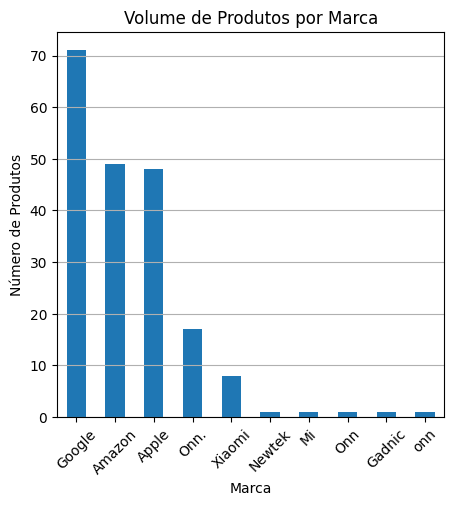

In [13]:
print("marcas encontradas:" ,df_produtos['BRAND'].unique())


brand_counts = df_produtos['BRAND'].value_counts()
print(brand_counts)

plt.figure(figsize=(5, 5))
brand_counts.plot(kind='bar')
plt.title('Volume de Produtos por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45)
plt.grid(axis='y')

----------
#- Análise exploratória do preço

['75990.00' '419990.00' '119990.00' '169999.00' '69990.00' '129990.00'
 '99990.00' '85995.00' '368000.00' '55990.00' '89990.00' '64990.00'
 '129490.00' '19900.00' '59990.00' '270000.00' '154990.00' '814644.00'
 '79990.00' '84990.00' '71990.00' '199990.00' '177100.00' '4999.00'
 '10900.00' '339990.00' '269990.00' '49990.00' '170000.00' '1100000.00'
 '68990.00' '59999.00' '65000.00' '159999.00' '49000.00' '60000.00'
 '89999.00' '50000.00' '99000.00' '61000.00' '405399.00' '599990.00'
 '477099.00' '588000.00' '446400.00' '22222222.00' '329990.00' '567000.00'
 '699997.00' '549999.99' '432000.00' '35000.00' '300000.00' '62000.00'
 '45000.00' '380000.00' '46000.00' '37081.98' '195000.00' '85000.00'
 '80000.00' '70000.00' '100000.00' '140000.00' '94000.00' '95000.00'
 '38000.00' '25775.20' '559000.00' '55000.00' '59000.00' '200000.00'
 '81000.00' '150000.00' '58000.00' '98000.00' '180000.00' '83790.00'
 '239999.00' '66691.00' '95727.00' '116990.00' '148200.00' '85199.00'
 '81300.00' '86490.00

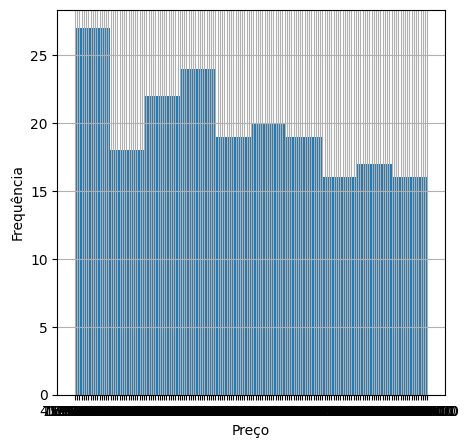

In [21]:

# tratamento
df_produtos['price'] = pd.to_numeric(df_produtos['price'], errors='coerce')
df_produtos['price'] = df_produtos['price'].apply(lambda x: f'{x:.2f}' if pd.notnull(x) else None)
#df_produtos['price'] = df_produtos['price'].astype(float)


#df_produtos['price'] = df_produtos['price'].round(2)
print(df_produtos['price'].unique())

##ranges = [0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000]
##df_produtos['price_range'] = pd.cut(df_produtos['price'], bins=ranges)


df_produtos['price'].hist(figsize=(5, 5), bins=10)



plt.xlabel('Preço')
plt.ylabel('Frequência')

plt.show()

#- Análise exploratória da capacidade de armazenamento
aqui é necessário um tratamento para trazer apenas os valores númericos e depois plotar no grafico


capacidades encontradas: [nan '64 GB' '32 GB' '128 GB' '3 GB' '8 GB' '160 GB' '2 GB' '16 GB' '5 GB']
STORAGE_CAPACITY
8 GB      101
64 GB       9
32 GB       6
128 GB      3
16 GB       2
5 GB        2
3 GB        1
160 GB      1
2 GB        1
Name: count, dtype: int64


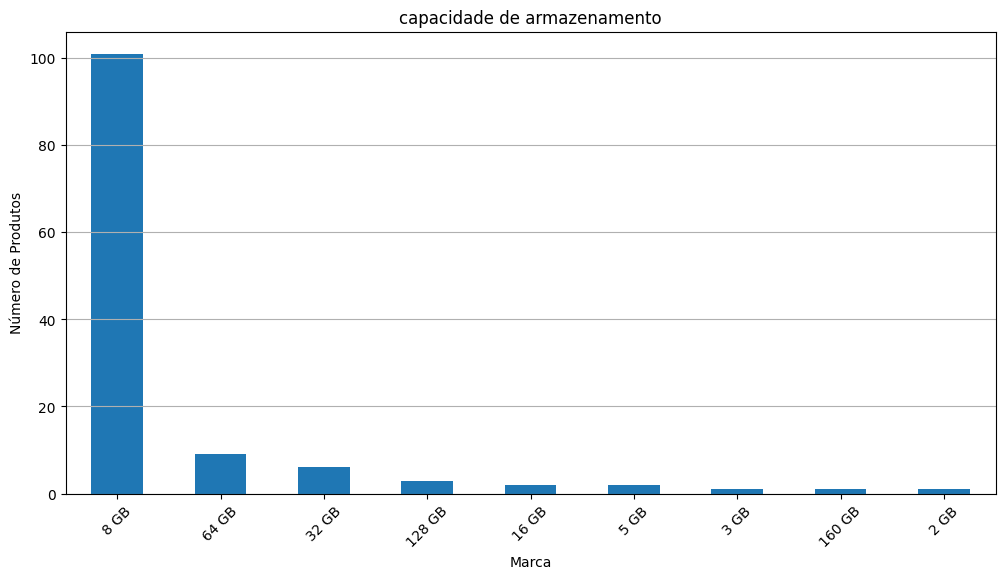

In [16]:
print("capacidades encontradas:" ,df_produtos['STORAGE_CAPACITY'].unique())


storage_counts = df_produtos['STORAGE_CAPACITY'].value_counts()
print(storage_counts)

plt.figure(figsize=(12, 6))
storage_counts.plot(kind='bar')
plt.title('capacidade de armazenamento')
plt.xlabel('Marca')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45)
plt.grid(axis='y')

- por marca

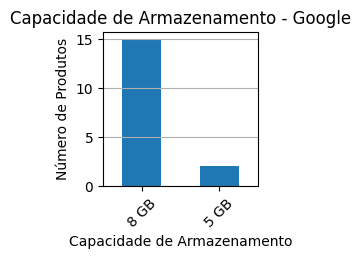

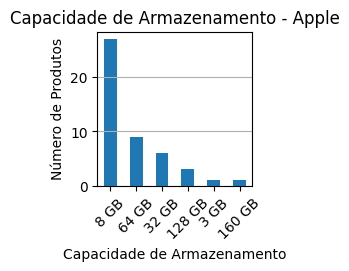

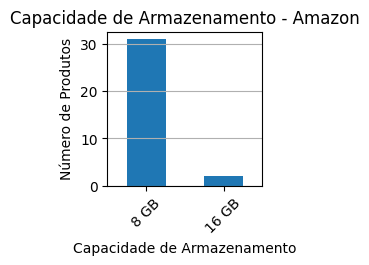

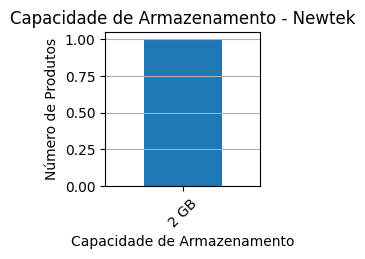

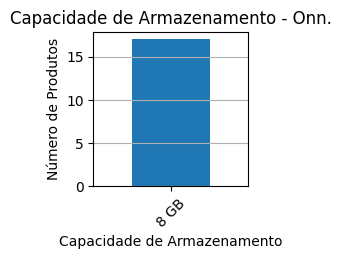

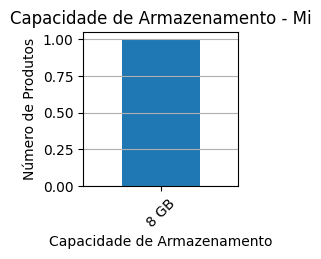

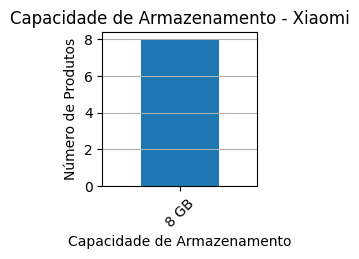

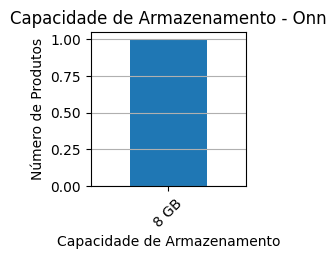

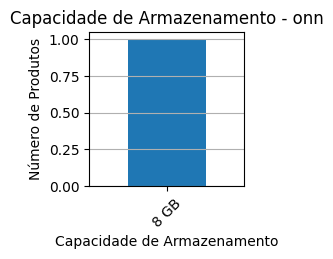

In [19]:
brands = df_produtos['BRAND'].unique()

# Loop para criar gráficos para cada marca
for brand in brands:
    # filtra o dataframe para a marca
    brand_data = df_produtos[df_produtos['BRAND'] == brand]

    # conta os armazenamentos para a marca
    storage_counts = brand_data['STORAGE_CAPACITY'].value_counts()


    if not storage_counts.empty:
        plt.figure(figsize=(2, 2))
        storage_counts.plot(kind='bar')
        plt.title(f'Capacidade de Armazenamento - {brand}')
        plt.xlabel('Capacidade de Armazenamento')
        plt.ylabel('Número de Produtos')
        plt.xticks(rotation=45)
        plt.grid(axis='y')

        plt.show()


#- Análise exploratória da capacidade de RAM



capacidades encontradas: [nan '2 GB' '64 GB' '3 GB' '256 MB' '512 MB' '1 GB' '8 GB' '512 GB'
 '128 GB' '1.5 GB' '16 GB' '4 GB']
RAM_MEMORY
2 GB      44
1 GB      25
1.5 GB    23
512 MB    18
3 GB       6
256 MB     6
512 GB     2
64 GB      1
8 GB       1
128 GB     1
16 GB      1
4 GB       1
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2 GB'),
  Text(1, 0, '1 GB'),
  Text(2, 0, '1.5 GB'),
  Text(3, 0, '512 MB'),
  Text(4, 0, '3 GB'),
  Text(5, 0, '256 MB'),
  Text(6, 0, '512 GB'),
  Text(7, 0, '64 GB'),
  Text(8, 0, '8 GB'),
  Text(9, 0, '128 GB'),
  Text(10, 0, '16 GB'),
  Text(11, 0, '4 GB')])

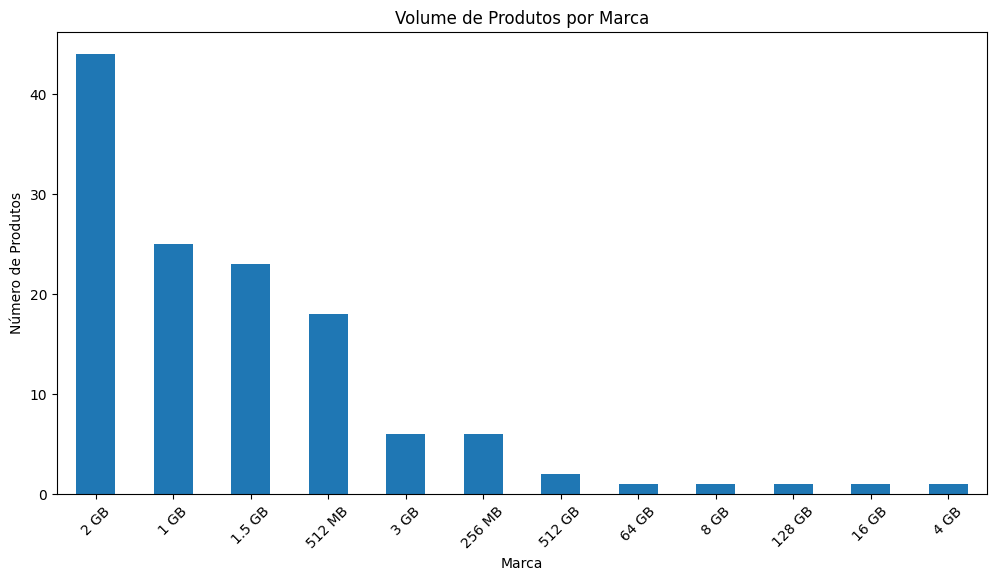

In [20]:
print("capacidades encontradas:" ,df_produtos['RAM_MEMORY'].unique())


ram_counts = df_produtos['RAM_MEMORY'].value_counts()
print(storage_counts)

plt.figure(figsize=(12, 6))
storage_counts.plot(kind='bar')
plt.title('Volume de Produtos por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45)